---
title: Justification for the tau
---

In [1]:
using AlgebraOfGraphics
using AlgebraOfGraphics: density
using CairoMakie
using DataFrames
using DataFramesMeta
using CategoricalArrays
using Arrow
using PartialFunctions
using LaTeXStrings
using Statistics


set_aog_theme!()

In [10]:
df = reduce(vcat, [
    load(tau = 20),    
    load(tau = 60),
    load(tau = 180),
])

df.tau = CategoricalArray(df.tau)

names(df)

95-element Vector{String}:
 "time"
 "tstart"
 "tstop"
 "t.d_end"
 "t.d_start"
 "t.d_time"
 "index_diff"
 "len"
 "std"
 "std_prev"
 ⋮
 "v.Alfven.after.l"
 "n.change"
 "v.ion.change.l"
 "B.change"
 "v.Alfven.change"
 "v.Alfven.change.l"
 "r"
 "tau"
 "ts"

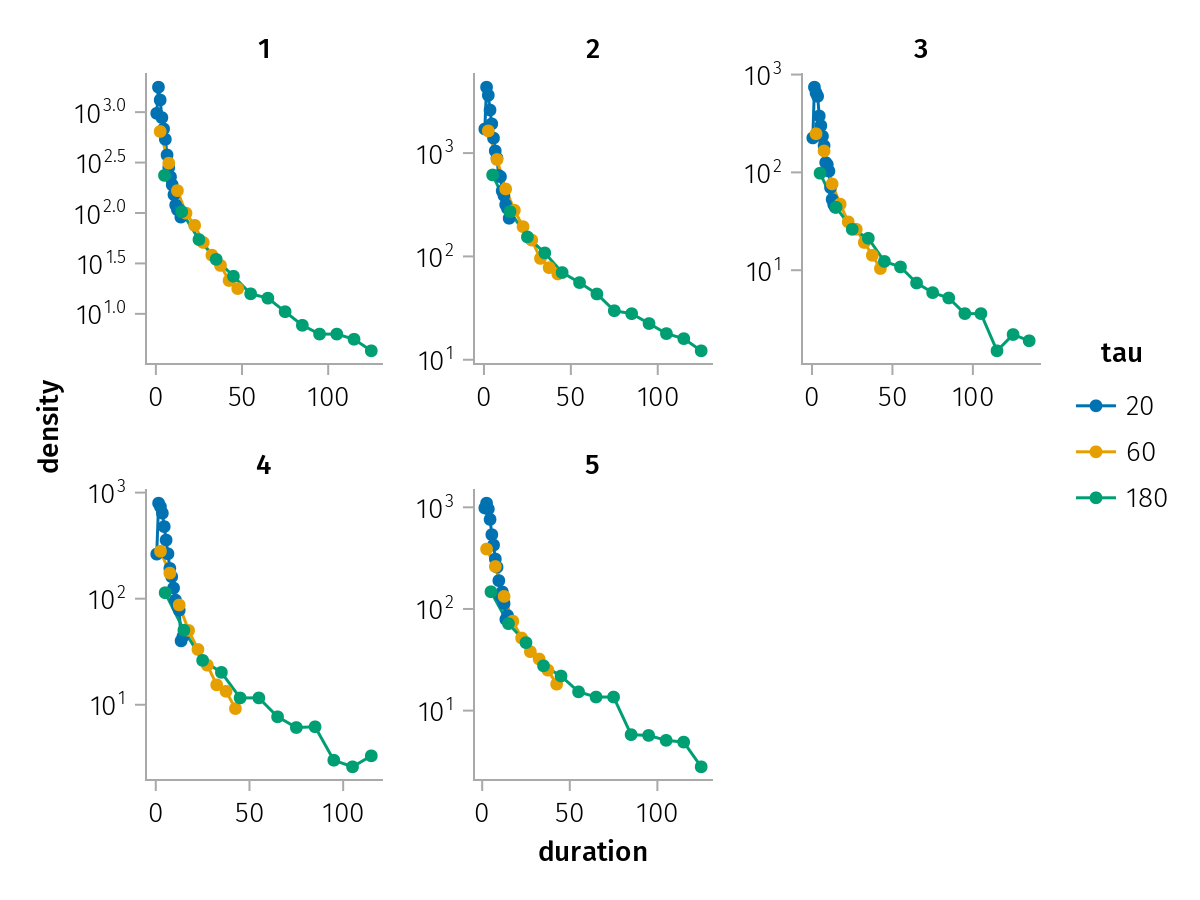

In [31]:
datalimits_f = x -> (0,100)
datalimits_f = x -> quantile(x, [0.05, 0.95])
specs = data(df) * mapping(:duration, dodge=:tau, color=:tau, layout=:r) * histogram(;datalimits = datalimits_f, normalization=:density) * (visual(Lines) + visual(Scatter))
axis = (; yscale=log10)
draw(specs, axis = axis, facet = (; linkxaxes = :none, linkyaxes = :none))

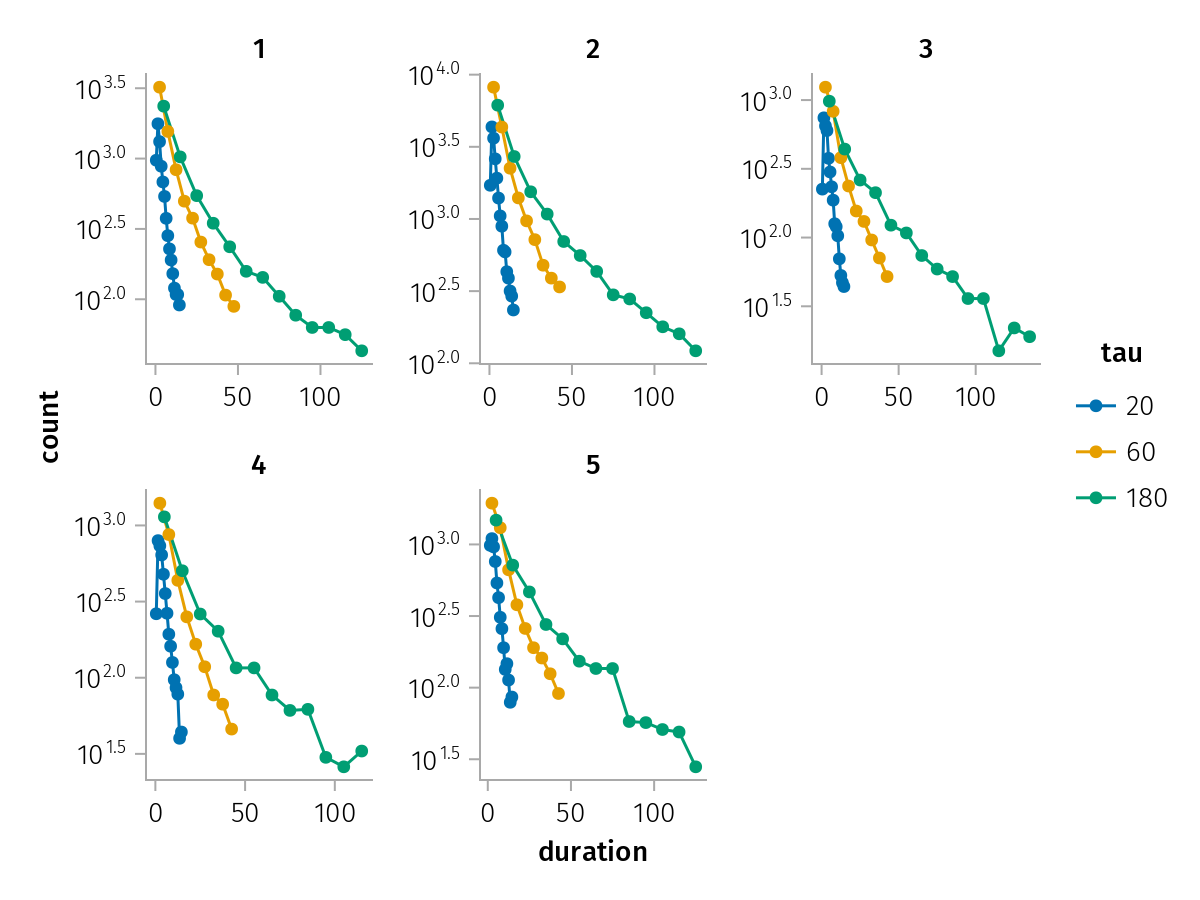

In [32]:
specs = data(df) * mapping(:duration, dodge=:tau, color=:tau, layout=:r) * histogram(;datalimits = datalimits_f) * (visual(Lines) + visual(Scatter))
axis = (; yscale=log10)
draw(specs, axis = axis, facet = (; linkxaxes = :none, linkyaxes = :none))

And large duration probabilities remain the same from 1-5au
This is sufficient to justify using one tau in different radial distances

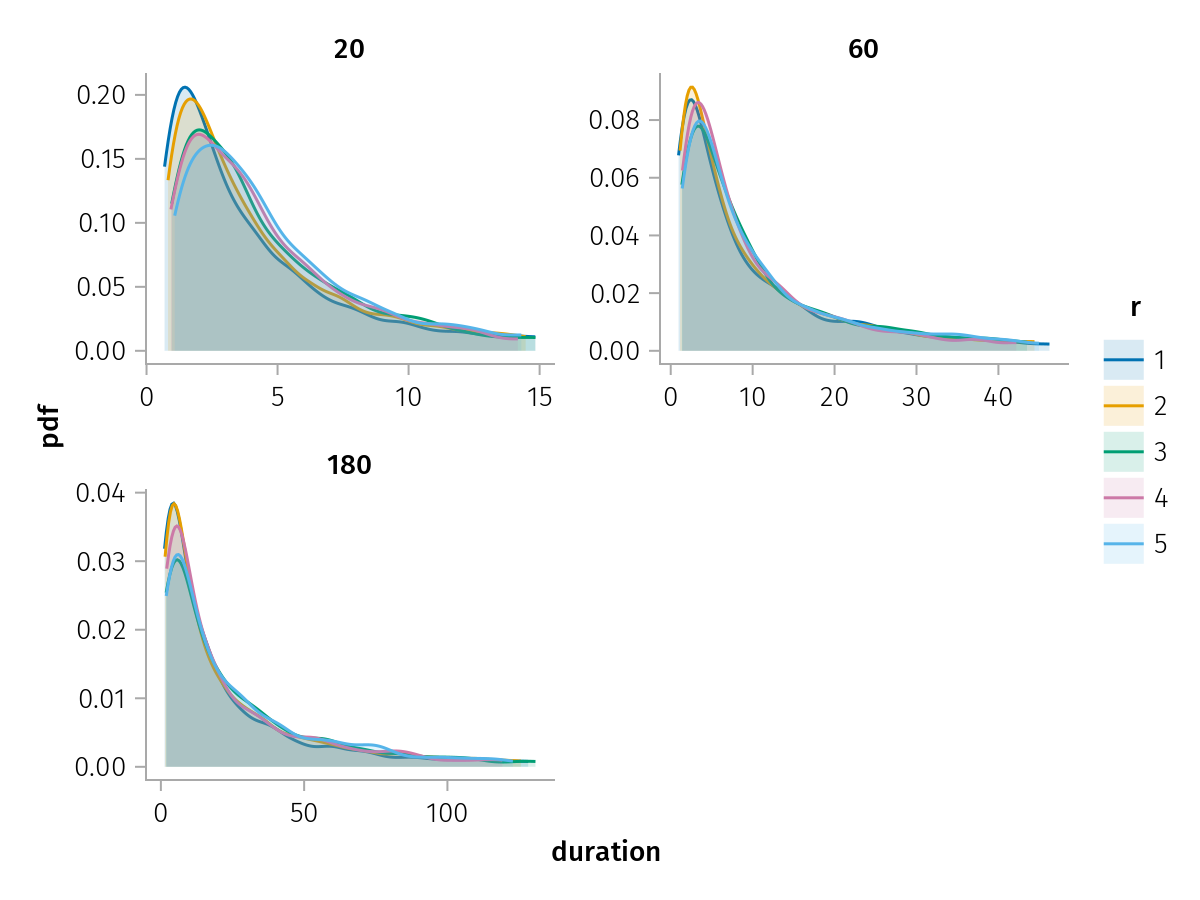

In [17]:
datalimits_f = x -> quantile(x, [0.05, 0.95])
specs = data(df) * mapping(:duration, color=:r, layout=:tau) * density(;datalimits = datalimits_f)
draw(specs, facet = (; linkxaxes = :none, linkyaxes = :none))